In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'india_housing_prices.csv')

In [3]:
df.head(10)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
5,6,West Bengal,Durgapur,Locality_246,Apartment,4,3500,135.28,0.04,2020,...,5,7,7,Low,Yes,Yes,"Playground, Clubhouse",West,Broker,Ready_to_Move
6,7,Tamil Nadu,Coimbatore,Locality_254,Independent House,3,4826,318.12,0.07,2016,...,9,3,6,High,No,Yes,"Clubhouse, Garden, Playground",North,Builder,Under_Construction
7,8,Chhattisgarh,Bilaspur,Locality_490,Independent House,5,4252,141.39,0.03,2021,...,4,10,10,High,Yes,Yes,"Gym, Pool, Clubhouse, Playground",North,Builder,Under_Construction
8,9,Delhi,New Delhi,Locality_232,Villa,4,2678,189.16,0.07,2003,...,22,7,5,Low,No,Yes,"Garden, Clubhouse, Playground",South,Broker,Under_Construction
9,10,Jharkhand,Ranchi,Locality_122,Villa,2,1393,187.42,0.13,2011,...,14,3,3,High,Yes,No,"Clubhouse, Playground, Garden, Gym",East,Owner,Ready_to_Move


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [5]:
df.isna().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

### does price depend significantly on state?

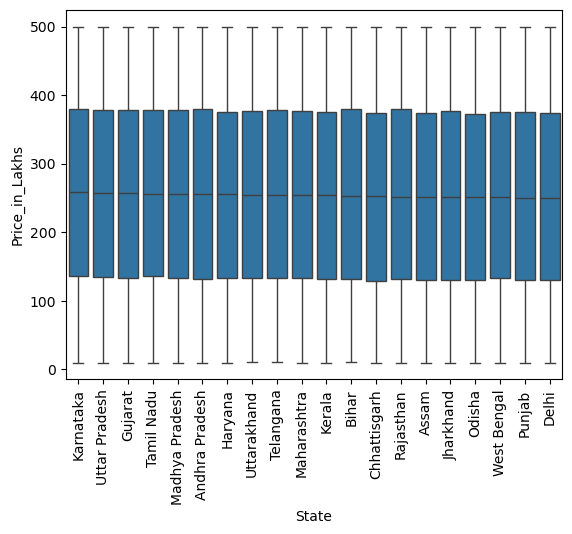

In [6]:
grouped_state=df.groupby('State')['Price_in_Lakhs'].agg(['median']).reset_index()
sorted_categories=grouped_state.sort_values(by='median', ascending=False)['State']
sns.boxplot(df, x='State', y='Price_in_Lakhs',order=sorted_categories)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Property_Type', ylabel='Price_in_Lakhs'>

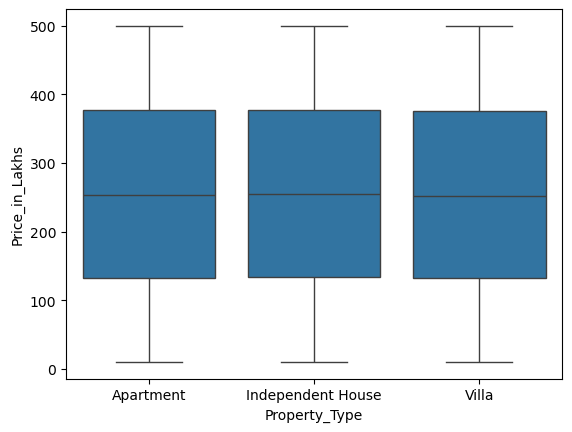

In [7]:
sns.boxplot(df, x="Property_Type", y="Price_in_Lakhs")

#### Joint Plots

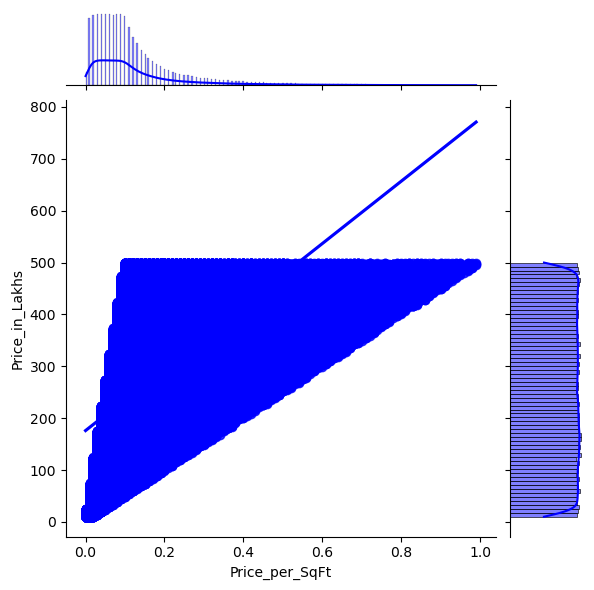

In [92]:
sns.jointplot(data=df, x='Price_per_SqFt', y='Price_in_Lakhs', kind='reg', color='blue')

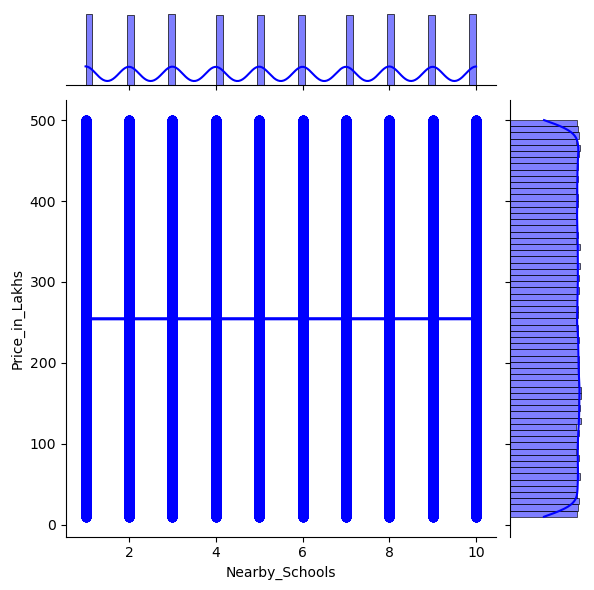

In [93]:
sns.jointplot(data=df, x='Nearby_Schools', y='Price_in_Lakhs', kind='reg', color='blue')

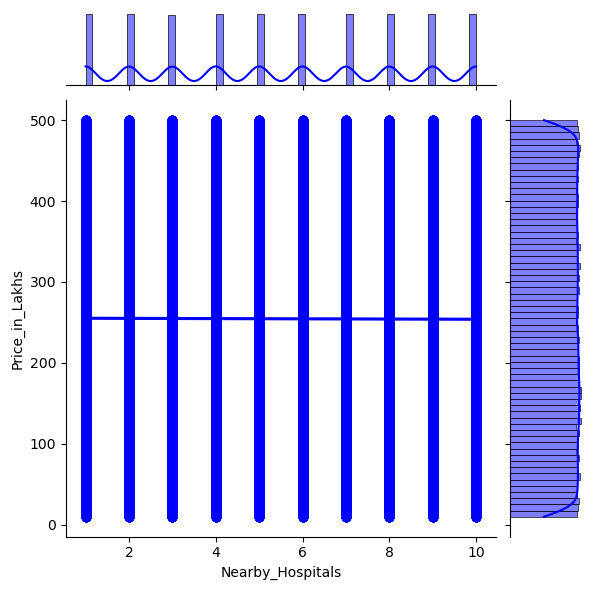

In [94]:
sns.jointplot(data=df, x='Nearby_Hospitals', y='Price_in_Lakhs', kind='reg', color='blue')

In [96]:
df.Security.value_counts()

Security
Yes    125233
No     124767
Name: count, dtype: int64

In [8]:
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

In [9]:
df.Public_Transport_Accessibility.value_counts()

Public_Transport_Accessibility
High      83705
Low       83287
Medium    83008
Name: count, dtype: int64

In [10]:
df.Price_per_SqFt.describe()

count    250000.000000
mean          0.130597
std           0.130747
min           0.000000
25%           0.050000
50%           0.090000
75%           0.160000
max           0.990000
Name: Price_per_SqFt, dtype: float64

In [11]:
df.Year_Built.value_counts()

Year_Built
2023    7568
2004    7526
2015    7487
2007    7468
1999    7456
2003    7425
2006    7416
2000    7413
2019    7390
2014    7388
2012    7385
1993    7385
2010    7378
1992    7364
2020    7359
2017    7355
1996    7354
1997    7353
1995    7350
2021    7328
2009    7326
2002    7323
1990    7314
2022    7311
2016    7307
1994    7299
2013    7283
2005    7280
2001    7271
2011    7266
2008    7236
2018    7233
1991    7218
1998    7185
Name: count, dtype: int64

In [12]:
df.Locality.describe()

count           250000
unique             500
top       Locality_296
freq               567
Name: Locality, dtype: object

In [13]:
df.Amenities.head(10)

0    Playground, Gym, Garden, Pool, Clubhouse
1    Playground, Clubhouse, Pool, Gym, Garden
2            Clubhouse, Pool, Playground, Gym
3    Playground, Clubhouse, Gym, Pool, Garden
4    Playground, Garden, Gym, Pool, Clubhouse
5                       Playground, Clubhouse
6               Clubhouse, Garden, Playground
7            Gym, Pool, Clubhouse, Playground
8               Garden, Clubhouse, Playground
9          Clubhouse, Playground, Garden, Gym
Name: Amenities, dtype: object

In [14]:
df.BHK.value_counts()

BHK
1    50196
5    50134
3    50067
2    49815
4    49788
Name: count, dtype: int64

In [15]:
df.Floor_No.value_counts(dropna=False)

Floor_No
20    8283
0     8203
17    8197
5     8174
6     8166
15    8154
8     8149
18    8145
2     8125
26    8114
14    8108
7     8106
27    8091
12    8077
1     8076
30    8076
29    8075
3     8073
9     8064
25    8056
16    8051
11    8041
21    7991
13    7990
10    7975
28    7966
4     7949
23    7912
22    7876
24    7869
19    7868
Name: count, dtype: int64

In [16]:
df.Furnished_Status.value_counts()

Furnished_Status
Unfurnished       83408
Semi-furnished    83374
Furnished         83218
Name: count, dtype: int64

In [17]:
df.Total_Floors.value_counts()

Total_Floors
24    8520
5     8501
30    8485
3     8439
26    8432
9     8416
20    8414
27    8403
10    8395
23    8388
2     8380
14    8367
25    8354
1     8347
15    8336
28    8334
6     8327
19    8316
12    8303
8     8301
4     8297
16    8279
13    8271
17    8251
22    8218
7     8216
29    8212
18    8205
21    8158
11    8135
Name: count, dtype: int64

In [18]:
df['Nearby_Schools'].value_counts()

Nearby_Schools
1     25360
8     25290
10    25237
3     25045
5     25023
2     24851
6     24824
9     24823
7     24808
4     24739
Name: count, dtype: int64

In [19]:
df['Nearby_Hospitals'].value_counts()

Nearby_Hospitals
4     25168
5     25102
6     25082
1     25075
9     25014
10    24987
2     24960
8     24891
7     24887
3     24834
Name: count, dtype: int64

In [20]:
df['Public_Transport_Accessibility'].value_counts()

Public_Transport_Accessibility
High      83705
Low       83287
Medium    83008
Name: count, dtype: int64

In [21]:
df['Facing'].value_counts()

Facing
West     62757
North    62637
South    62337
East     62269
Name: count, dtype: int64

In [22]:
df['Owner_Type'].value_counts()

Owner_Type
Broker     83479
Owner      83268
Builder    83253
Name: count, dtype: int64

In [23]:
df['Availability_Status'].value_counts()

Availability_Status
Under_Construction    125035
Ready_to_Move         124965
Name: count, dtype: int64

In [24]:
df['Parking_Space'].value_counts()

Parking_Space
No     125456
Yes    124544
Name: count, dtype: int64

### Feature Engineering

##### Creating no of years from Year_Built

In [25]:
df['No_of_Years']=2025-df.Year_Built

In [26]:
df.No_of_Years.describe(), df.Age_of_Property.describe()

(count    250000.000000
 mean         18.479988
 std           9.808575
 min           2.000000
 25%          10.000000
 50%          18.000000
 75%          27.000000
 max          35.000000
 Name: No_of_Years, dtype: float64,
 count    250000.000000
 mean         18.479988
 std           9.808575
 min           2.000000
 25%          10.000000
 50%          18.000000
 75%          27.000000
 max          35.000000
 Name: Age_of_Property, dtype: float64)

##### Splitting amenities

In [27]:
df.Amenities.str.split(',',expand=True)

,0,1,2,3,4
0,Playground,Gym,Garden,Pool,Clubhouse
1,Playground,Clubhouse,Pool,Gym,Garden
2,Clubhouse,Pool,Playground,Gym,None
3,Playground,Clubhouse,Gym,Pool,Garden
4,Playground,Garden,Gym,Pool,Clubhouse
...,...,...,...,...,...
249995,Playground,Garden,Gym,Clubhouse,Pool
249996,Playground,None,None,None,None
249997,Playground,None,None,None,None
249998,Playground,Gym,Pool,None,None


In [28]:
df['has_Playground']=df.Amenities.str.contains('Playground')

In [29]:
df['has_Pool']=df.Amenities.str.contains('Pool')

In [30]:
df['has_Gym']=df.Amenities.str.contains('Gym')

In [31]:
df['has_Clubhouse']=df.Amenities.str.contains('Clubhouse')

In [32]:
df['has_Garden']=df.Amenities.str.contains('Garden')

##### Floor Number modification

In [33]:
def set_floor(floor):
    if floor==0:
        return 'Ground'
    elif floor<=5:
        return 'Lower'
    elif floor>=5:
        return 'Higher'

In [34]:
df['Floor_type']=df.Floor_No.apply(set_floor)

In [35]:
df['Floor_type'].value_counts(dropna=False)

Floor_type
Higher    201400
Lower      40397
Ground      8203
Name: count, dtype: int64

In [36]:
df[['Total_Floors','Floor_No']].value_counts()

Total_Floors  Floor_No
24            7           326
23            20          321
30            25          318
3             8           317
9             27          316
                         ... 
7             7           227
14            15          224
21            4           223
28            3           222
24            30          217
Name: count, Length: 930, dtype: int64

In [37]:
df['Floor_to_total_floor_ratio']=np.where(df.Floor_No>0,df.Floor_No / df.Total_Floors,0)

In [38]:
df['Floor_to_total_floor_ratio'].describe()

count    250000.000000
mean          1.995351
std           3.518869
min           0.000000
25%           0.466667
50%           0.964286
75%           1.888889
max          30.000000
Name: Floor_to_total_floor_ratio, dtype: float64

##### parking space

In [39]:
df['Parking_Space_new']=np.where(df.Parking_Space=='Yes',1,0)

In [40]:
df.Parking_Space_new.value_counts()

Parking_Space_new
0    125456
1    124544
Name: count, dtype: int64

##### encoding the feature with onehot for linear model

In [41]:
df.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,No_of_Years,Floor_to_total_floor_ratio,Parking_Space_new
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016,18.479988,1.995351,0.498176
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860,9.808575,3.518869,0.499998
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000,10.000000,0.466667,0.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000,18.000000,0.964286,0.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000,27.000000,1.888889,1.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000,35.000000,30.000000,1.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [51]:
feat_to_encode=[
    'State',
    'Furnished_Status',
    'Property_Type',
    'Public_Transport_Accessibility',
    'Parking_Space',
    'Security',
    'Facing',
    'Owner_Type',
    'Availability_Status',
    'Floor_type']

In [52]:
one_hot_encoded_df = pd.get_dummies(df,columns=feat_to_encode, drop_first=True)

In [53]:
one_hot_encoded_df.columns

Index(['ID', 'City', 'Locality', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs',
       'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors',
       'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Amenities',
       'No_of_Years', 'has_Playground', 'has_Pool', 'has_Gym', 'has_Clubhouse',
       'has_Garden', 'Floor_to_total_floor_ratio', 'Parking_Space_new',
       'State_Assam', 'State_Bihar', 'State_Chhattisgarh', 'State_Delhi',
       'State_Gujarat', 'State_Haryana', 'State_Jharkhand', 'State_Karnataka',
       'State_Kerala', 'State_Madhya Pradesh', 'State_Maharashtra',
       'State_Odisha', 'State_Punjab', 'State_Rajasthan', 'State_Tamil Nadu',
       'State_Telangana', 'State_Uttar Pradesh', 'State_Uttarakhand',
       'State_West Bengal', 'Furnished_Status_Semi-furnished',
       'Furnished_Status_Unfurnished', 'Property_Type_Independent House',
       'Property_Type_Villa', 'Public_Transport_Accessibility_Low',
       'Public_Transport_Accessibility_Medium', 'Parking

#### Final Model Code

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
one_hot_encoded_df.shape

(250000, 57)

In [82]:
X= one_hot_encoded_df[['BHK','Size_in_SqFt','Price_per_SqFt',  'Floor_No', 
       'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'has_Playground', 'has_Pool', 'has_Gym', 'has_Clubhouse',
       'has_Garden', 'Floor_to_total_floor_ratio', 'Parking_Space_new',
        'Furnished_Status_Semi-furnished',
       'Furnished_Status_Unfurnished', 'Property_Type_Independent House',
       'Property_Type_Villa', 'Public_Transport_Accessibility_Low',
       'Public_Transport_Accessibility_Medium', 'Parking_Space_Yes',
       'Security_Yes', 'Facing_North', 'Facing_South', 'Facing_West',
       'Owner_Type_Builder', 'Owner_Type_Owner',
       'Availability_Status_Under_Construction', 'Floor_type_Higher',
       'Floor_type_Lower']]

In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   BHK                                     250000 non-null  int64  
 1   Size_in_SqFt                            250000 non-null  int64  
 2   Price_per_SqFt                          250000 non-null  float64
 3   Floor_No                                250000 non-null  int64  
 4   Age_of_Property                         250000 non-null  int64  
 5   Nearby_Schools                          250000 non-null  int64  
 6   Nearby_Hospitals                        250000 non-null  int64  
 7   has_Playground                          250000 non-null  bool   
 8   has_Pool                                250000 non-null  bool   
 9   has_Gym                                 250000 non-null  bool   
 10  has_Clubhouse                           2500

In [84]:
y=one_hot_encoded_df['Price_in_Lakhs']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)


Intercept: -32.61653679633423
Coefficient: [-8.17321415e-02  5.92311850e-02  9.62024565e+02  2.80805231e-02
 -5.25897895e-03  1.98289979e-04 -5.78382724e-02 -4.59075153e-01
 -1.23983679e-01  6.66444646e-01  2.63899500e-01 -1.58755251e-01
  9.13198350e-04  1.04493517e-01 -5.76319272e-01  6.47074805e-02
  1.84557612e-01 -1.11408752e+00 -1.08362128e-01 -2.91310097e-01
  1.04493517e-01  8.84357677e-01  6.92151889e-02 -6.84970917e-02
 -4.47716499e-02 -1.36969501e-01 -7.40750485e-01 -2.25891862e-01
 -7.29462064e-01 -6.47183316e-01]
Mean Squared Error (MSE): 10129.966247931825
R-squared: 0.49255504344882606
